In [25]:
import numpy as np
from matplotlib import pyplot as plt
import requests
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Carseats.csv')
df['Urban'] = df['Urban'].map({'Yes': 1, 'No': 0})
df['US'] = df['US'].map({'Yes': 1, 'No': 0})
df['ShelveLoc'] = df['ShelveLoc'].map({'Bad': -1, 'Medium': 0, 'Good':1})
high = (df['Sales']>8).astype(int)

df.insert(0, 'High', high, )
#df['High'] = df['High'].map({0:'No', 1:'Yes'})
df.tail()

,High,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,1,12.57,138,108,17,203,128,1,33,14,1,1
396,0,6.14,139,23,3,37,120,0,55,11,0,1
397,0,7.41,162,26,12,368,159,0,40,18,1,1
398,0,5.94,100,79,7,284,95,-1,50,12,1,1
399,1,9.71,134,37,0,27,120,1,49,16,1,1


In [3]:
df['ShelveLoc'].unique()

array([-1,  1,  0])

In [4]:
train, val, test = np.split(df.sample(frac=1, random_state=42), 
                                 [int(.6*len(df)), int(.8*len(df))])
train.shape, val.shape, test.shape

h_train, s_train, x_train = np.split(train, [1,2], axis=1)
h_val, s_val, x_val = np.split(val, [1,2], axis=1)
h_test, s_test, x_test = np.split(test, [1,2], axis=1)

b) Arbol que clasifica una variable categorica 'High'

In [12]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, h_train)
print(
        ('Tree depth: {}\nNumber of leaves: {}\nTrain accuracy: {:.3f}'
        '\nValidation accuracy: {:.3f}').format(tree.get_depth(), 
        tree.get_n_leaves(), tree.score(x_train, h_train), 
        tree.score(x_val, h_val))
    )

Tree depth: 3
Number of leaves: 8
Train accuracy: 0.808
Validation accuracy: 0.725


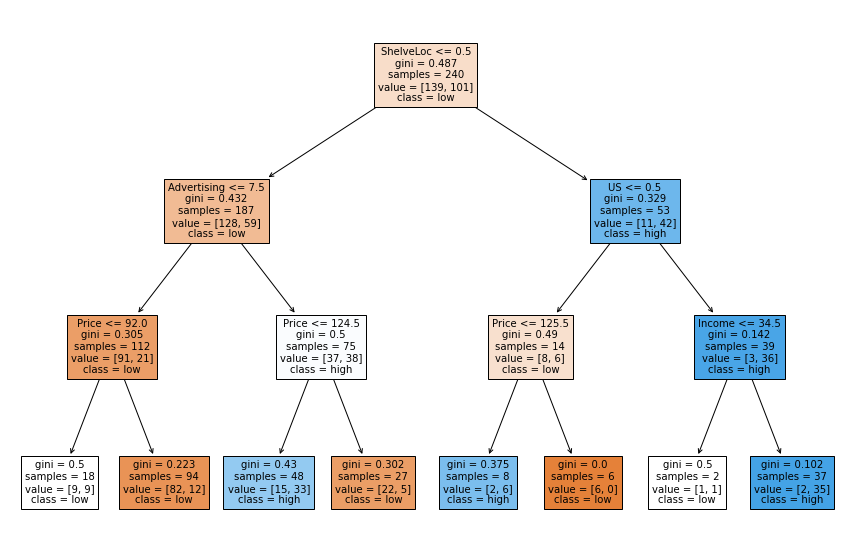

In [14]:
fig = plt.figure(figsize=(15,10))
plot_tree(tree, feature_names=x_train.columns, class_names=['low', 'high'], filled=True);

c) Ahora un arbol para la variable continua Sales

In [52]:
tree2 = DecisionTreeRegressor(max_depth=4, max_features='sqrt')
tree2.fit(x_train, h_train)
print(
        ('Tree depth: {}\nNumber of leaves: {}\nTrain MSE: {:.2f}'
        '\nValidation MSE: {:.2f}').format(tree2.get_depth(), 
        tree2.get_n_leaves(), mean_squared_error(s_train, tree2.predict(x_train)), 
        mean_squared_error(s_val, tree2.predict(x_val)))
        )


Tree depth: 4
Number of leaves: 15
Train MSE: 58.73
Validation MSE: 53.50


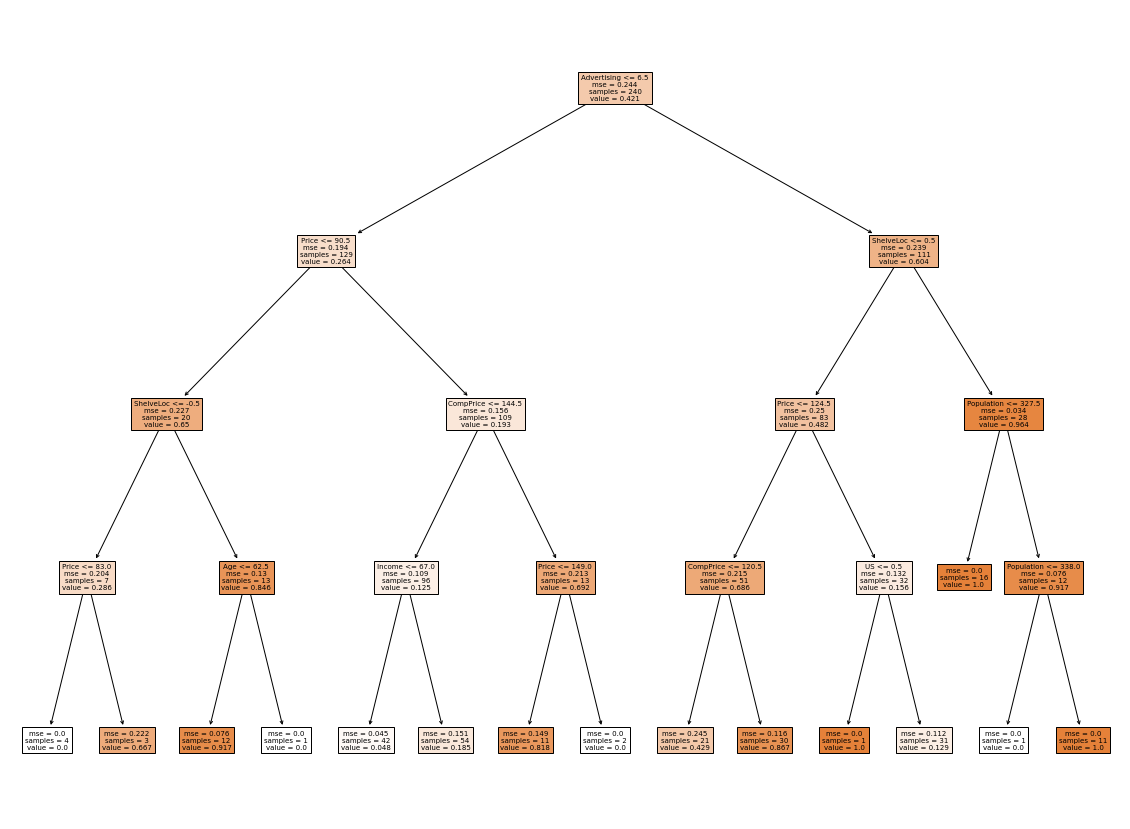

In [54]:
fig = plt.figure(figsize=(20,15))
plot_tree(tree2, feature_names=x_train.columns, filled=True);